<a href="https://colab.research.google.com/github/ronysierra/Analisis-Rotacion-Empleados/blob/main/Determinantes_e_Impacto_Financiero_de_la_Rotaci%C3%B3n_de_Empleados_Un_An%C3%A1lisis_Predictivo_con_IBM_HR_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Determinantes e Impacto Financiero de la Rotación de Empleados: Un Análisis Predictivo con IBM HR Analytics**

**Objetivo**

El objetivo de este análisis es identificar y comprender los factores que influyen en la rotación de empleados dentro de una organización, utilizando el dataset IBM HR Analytics Employee Attrition & Performance. A partir de este estudio, se busca estimar el impacto financiero derivado de dicha rotación, lo que permitirá desarrollar estrategias para mejorar la retención de talento y optimizar los recursos humanos en la empresa.

**Introducción**

La rotación de capital humano representa uno de los desafíos más significativos para las organizaciones, ya que conlleva altos costos asociados a la contratación, capacitación y pérdida de productividad. Este análisis se centra en el uso del dataset IBM HR Analytics Employee Attrition & Performance, el cual proporciona datos detallados sobre las características demográficas, laborales y de desempeño de los empleados. A través de un enfoque que combina técnicas de análisis exploratorio y modelado predictivo, se pretende desentrañar los patrones y variables que impulsan la decisión de los empleados de abandonar la empresa. La comprensión de estos factores no solo ofrece una visión integral del fenómeno, sino que también facilita la implementación de políticas y estrategias orientadas a la retención de talento, lo cual es fundamental para mejorar la eficiencia y la estabilidad financiera de la organización.

**1. Conexión origen de datos**

In [6]:
# Install dependencies as needed:
!pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
# The file is actually named 'WA_Fn-UseC_-HR-Employee-Attrition.csv'
# within the dataset
file_path = "WA_Fn-UseC_-HR-Employee-Attrition.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "pavansubhasht/ibm-hr-analytics-attrition-dataset",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

<ipython-input-6-f9d575b63a41>:12: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  df = kagglehub.load_dataset(


100%|██████████| 223k/223k [00:00<00:00, 2.09MB/s]

First 5 records:    Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOpti

**2. Exploración Inicial de los datos**

Antes de entrar en un análisis profundo, exploramos la estructura de los datos:

In [7]:
# Dimensiones del DataFrame
print("Dimensiones del dataset:", df.shape)

# Información general del dataset (tipos de datos, valores nulos, etc.)
print(df.info())

# Estadísticas descriptivas para columnas numéricas
print(df.describe())


Dimensiones del dataset: (1470, 35)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   

**3. Análisis Exploratorio de Datos**

***3.1 Distribución de la Rotación (Attrition)***
Distribución de los empleados que se quedaron vs. los que se fueron:

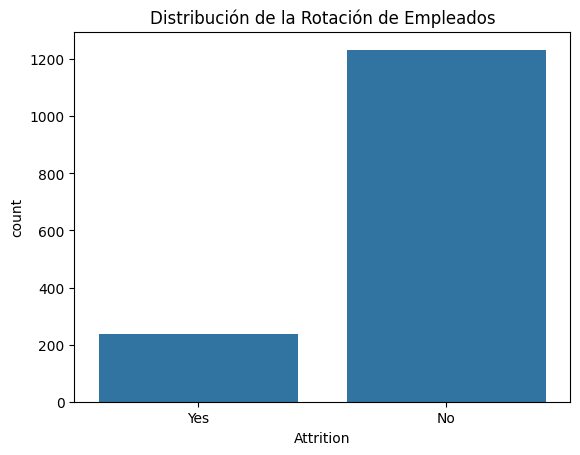

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='Attrition', data=df)
plt.title("Distribución de la Rotación de Empleados")
plt.show()


***3.2 Transformar la Variable 'Attrition'***

Transformar la columna de rotación en una variable binaria para facilitar el análisis y el modelo:

In [10]:
# Creamos una nueva columna que sea 1 si el empleado se fue y 0 si se quedó
df['Attrition_flag'] = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)


***3.3 Análisis de Variables Relevantes***

Análisis de cómo varía el ingreso mensual según la rotación:

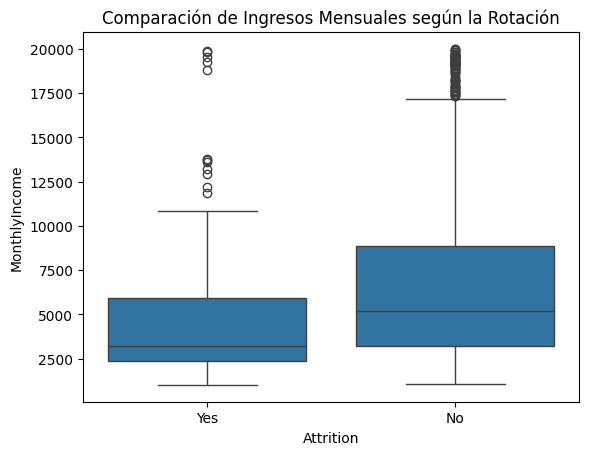

In [11]:
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.title("Comparación de Ingresos Mensuales según la Rotación")
plt.show()


Matriz de correlación para identificar relaciones entre variables numéricas

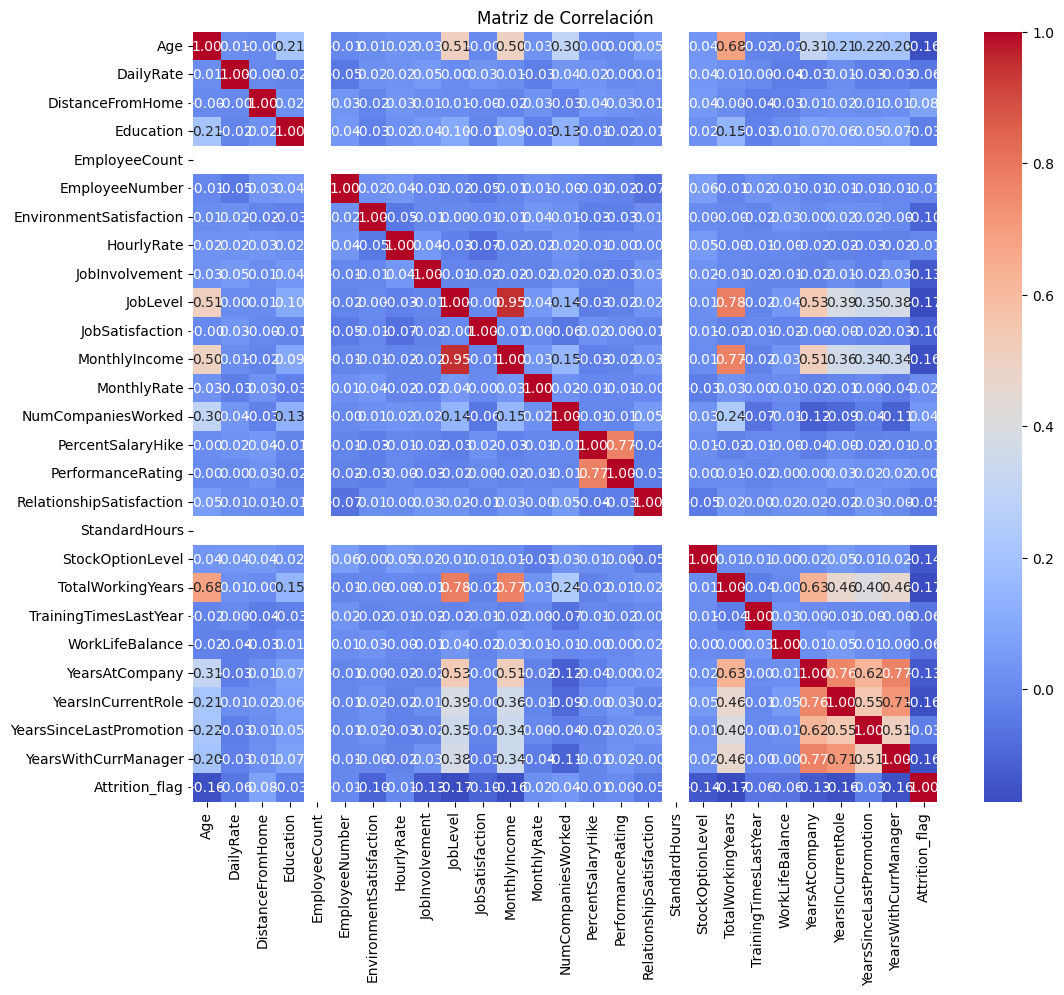

In [12]:
#Matriz de Correlación para identificar relaciones entre las variables numéricas
plt.figure(figsize=(12,10))
sns.heatmap(df.select_dtypes(include=['int64', 'float64']).corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Matriz de Correlación")
plt.show()


**4. Construir un Modelo Predictivo**
Después de haber hecho la exploración anterior, construimos un modelo para predecir la rotación.

***4.1 Preparar el Dataset para Modelado***


In [13]:
from sklearn.model_selection import train_test_split

# Convertir 'OverTime' a numérica (1 para 'Yes', 0 para 'No')
df['OverTime_numeric'] = df['OverTime'].map({'Yes': 1, 'No': 0})

# Variables de interés
features = ['Age', 'MonthlyIncome', 'JobSatisfaction', 'EnvironmentSatisfaction', 'OverTime_numeric']
X = df[features]
y = df['Attrition_flag']

# Dividir el dataset en conjunto de entrenamiento y prueba (70% entrenamiento, 30% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


***4.2 Entrenar y Evaluar el Modelo***
Utilizaremos una regresión logística:

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Crear y entrenar el modelo
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred))
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))


Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.87      0.98      0.93       380
           1       0.54      0.11      0.19        61

    accuracy                           0.86       441
   macro avg       0.71      0.55      0.56       441
weighted avg       0.83      0.86      0.82       441

Matriz de Confusión:
[[374   6]
 [ 54   7]]
